# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nisrina Aprilia Kamila
- **Email:** m011b4kx3388@bangkit.academy
- **ID Dicoding:** M011B4KX3388

## Menentukan Pertanyaan Bisnis

- Did bike rentals increase in 2012 compared to 2011?
- Do registered users borrow bikes more frequently than casual users, or vice versa?
- For casual users, are rentals concentrated on specific days like weekends, leading them to avoid registering for membership?
- How do seasons and weather conditions influence consumer behavior in bike rentals?

## Import Semua Packages/Library yang Digunakan

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load Day data by generating a day_df table




In [135]:
from google.colab import files

In [136]:
day_df = files.upload()

Saving day.csv to day (3).csv


In [137]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load Hour data by generating an hour_df table

In [138]:
hour_df = files.upload()

Saving hour.csv to hour (1).csv


In [139]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The day_df table contains 16 columns that hold information such as instant (a unique identifier), dteday (date), season, yr (year), mnth (month), holiday (whether it's a holiday), weekday (day of the week), workingday (whether it's a working day), weathersit (weather situation), temp (temperature), atemp (feeling temperature), hum (humidity), windspeed, casual (number of casual users), registered (number of registered users), and cnt (total count of rentals).

- The hour_df table is similar to the day_df table, but with an additional variable, hr (hour), which indicates the total number of rentals per hour.

### Assessing Data

Checking for various problems that could exist in the bike sharing data, such as missing values, duplicates, and data types.

In [140]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


It appears that the dteday data is still in object format and not in datetime format.



In [141]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [142]:
print("Number of duplicate data: ", day_df.duplicated().sum())


Number of duplicate data:  0


In [143]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- From a quick assessment, the only issue seems to be with the datetime data format.
- There are no missing values in the data, no duplicate data, and no anomalies were found in the generated summary data.

In [144]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


It appears that the dteday data is still in object format and not in datetime format.


In [145]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [146]:
print("Number of duplicate data: ", hour_df.duplicated().sum())

Number of duplicate data:  0


In [147]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Same as before, from a quick assessment, the only issue seems to be with the datetime data format.
- There are no missing values in the data, no duplicate data, and no anomalies were found in the generated summary data.

### Cleaning Data

The first thing to do is to change the data format of the dtetime variable.

In [148]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [149]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Rephrase the data content within the season, year, month, weekday, and weather situation variables. By replacing numerical values with descriptive terms, you make the data more understandable.

In [150]:
day_df['season'] = day_df['season'].replace([1, 2, 3, 4], ["Spring", "Summer", "Fall", "Winter"])
hour_df['season'] = hour_df['season'].replace([1, 2, 3, 4], ["Spring", "Summer", "Fall", "Winter"])

In [151]:
day_df['yr'] = day_df['yr'].replace([0, 1], ["2011", "2012"])
hour_df['yr'] = hour_df['yr'].replace([0, 1], ["2011", "2012"])

In [152]:
day_df['mnth'] = day_df['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                        ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
hour_df['mnth'] = hour_df['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                          ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [153]:
day_df['weekday'] = day_df['weekday'].replace([0, 1, 2, 3, 4, 5, 6],
                                              ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
hour_df['weekday'] = hour_df['weekday'].replace([0, 1, 2, 3, 4, 5, 6],
                                                ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [154]:
day_df['weathersit'] = day_df['weathersit'].replace([1, 2, 3, 4], ["Clear", "Cloudy", "Light Rain", "Heavy Rain"])
hour_df['weathersit'] = hour_df['weathersit'].replace([1, 2, 3, 4], ["Clear", "Cloudy", "Light Rain", "Heavy Rain"])

In [155]:
day_df.info(), day_df.head(), hour_df.info(), hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None,
    instant     dteday  season    yr mnth  holiday weekday  workingday  \
 0        1 2011-01-01  Spring  2011  Jan        0     Sat           0   
 1        2 2011-01-02  Spring  2011  Jan        0     Sun           0   
 2        3 2011-01-03  Spring  2011  Jan        0     Mon           1   
 3        4 2011-01-04  Spring  2011  Jan        0     Tue           1   
 4        5 2011-01-05  Spring  2011  Jan        0     Wed           1   
 
   weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0     Cloudy  0.344167  0.363625  0.805833   0.160446     331         654   
 1     Cloudy  0.363478  0.353739  0.696087   0.248539     131         670   
 2      Clear  0.196364  0.189405  0.437273   0.248309     120        1229   
 3      Clear  0.200000  0.212122  0.590435   0.160296     108        1454   
 4      Clear  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None,
   

Since the data type of the variables 'season', 'yr', 'mnth', 'weekday', and 'weathersit' has been altered but the format remains incompatible (still as objects rather than categorical), a data type conversion will be performed.

In [156]:
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [157]:
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [158]:
day_df.info(), day_df.head(), hour_df.info(), hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

(None,
    instant     dteday  season    yr mnth  holiday weekday  workingday  \
 0        1 2011-01-01  Spring  2011  Jan        0     Sat           0   
 1        2 2011-01-02  Spring  2011  Jan        0     Sun           0   
 2        3 2011-01-03  Spring  2011  Jan        0     Mon           1   
 3        4 2011-01-04  Spring  2011  Jan        0     Tue           1   
 4        5 2011-01-05  Spring  2011  Jan        0     Wed           1   
 
   weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0     Cloudy  0.344167  0.363625  0.805833   0.160446     331         654   
 1     Cloudy  0.363478  0.353739  0.696087   0.248539     131         670   
 2      Clear  0.196364  0.189405  0.437273   0.248309     120        1229   
 3      Clear  0.200000  0.212122  0.590435   0.160296     108        1454   
 4      Clear  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None,
   

Finally, the data cleaning process has been completed and we can proceed to the next stage: data exploration.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [159]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Aug,NaN,Mon,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Checking the number of bike-sharing renters for each season.


In [160]:
day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

<ipython-input-160-71e2fe9fb6a4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)


,cnt
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


**Insight:**
Bike rentals peak in the Fall, reaching a total of 1,061,129 rentals. This suggests a strong seasonal preference for cycling during this time. Summer follows closely with 918,589 rentals, highlighting the positive impact of warmer weather on outdoor activities like biking. While Winter still sees a significant number of rentals (841,613), it lags behind Fall and Summer. The Spring season, with only 471,348 rentals, appears to be the least popular for bike usage, possibly due to fluctuating weather or other factors influencing rider behavior.

Check the number of bike-sharing renters
by year.

In [161]:
day_df.groupby(by="yr").agg({
    "registered" : ["mean", "min", "max", "sum"],
    "casual" : ["mean", "min", "max", "sum"]
})

<ipython-input-161-a2d921e56c6f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="yr").agg({


registered                           casual                  
             mean  min   max      sum         mean min   max     sum
yr                                                                  
2011  2728.358904  416  4614   995851   677.402740   9  3065  247252
2012  4581.450820   20  6946  1676811  1018.483607   2  3410  372765

**Insight:**
A closer look at bike rental data from 2011 and 2012 reveals a surge in usage, particularly among registered users.

Registered users saw a significant increase in average rentals, jumping from around 2,728 in 2011 to 4,581 in 2012, a 68% boost. The total number of rentals by registered users more than doubled during this period. While the minimum number of rentals declined, the maximum rentals reached new heights, indicating increased peak usage.

Casual users also experienced growth, with average rentals climbing from 677 to 1,018. Total casual rentals rose from 247,252 to 372,765, showcasing growing interest in casual biking. Although the minimum number of casual rentals decreased slightly, the maximum rentals increased, suggesting a trend toward higher peak usage among casual riders.

Checking the number of bike-sharing renters every day.


In [162]:
day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)

<ipython-input-162-242f1ad8a2bf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)


,cnt
weekday,
Fri,487790
Thu,485395
Sat,477807
Wed,473048
Tue,469109
Mon,455503
Sun,444027


**Insight:**
The results from the aggregation of bike rental data by weekday provide valuable insights into user behavior and preferences. The data reveals that the highest number of rentals occurred on Friday, with a total of 487,790 rentals, closely followed by Thursday at 485,395 rentals. Additionally, the data indicates that bike rentals remain popular on Saturday (477,807) and Wednesday (473,048), reflecting a consistent interest in biking not only during weekends but also on weekdays, particularly midweek. Conversely, the lowest number of rentals was recorded on Monday (455,503) and Sunday (444,027).

In [163]:
weekday_eda = day_df.groupby(by="weekday", observed=True).agg({
    "registered": ["mean", "min", "max", "sum"],
    "casual": ["mean", "min", "max", "sum"]
})

In [164]:
sorted_registered = weekday_eda.sort_values(by=('registered', 'sum'), ascending=False)

In [165]:
sorted_casual = weekday_eda.sort_values(by=('casual', 'sum'), ascending=False)

In [166]:
print(sorted_registered)

          registered                           casual                  
                mean   min   max     sum         mean min   max     sum
weekday                                                                
Thu      4076.298077   416  6781  423935   590.961538  15  1405   61460
Wed      3997.394231   432  6946  415729   551.144231   9  2562   57319
Tue      3954.480769   573  6697  411266   556.182692   9  1348   57843
Fri      3938.000000  1129  6917  409552   752.288462  38  2469   78238
Mon      3663.990476    20  6435  384719   674.133333   2  3065   70784
Sat      3085.285714   570  5966  323955  1465.257143  57  3410  153852
Sun      2890.533333   451  5657  303506  1338.295238  54  3283  140521


In [167]:
print(sorted_casual)

          registered                           casual                  
                mean   min   max     sum         mean min   max     sum
weekday                                                                
Sat      3085.285714   570  5966  323955  1465.257143  57  3410  153852
Sun      2890.533333   451  5657  303506  1338.295238  54  3283  140521
Fri      3938.000000  1129  6917  409552   752.288462  38  2469   78238
Mon      3663.990476    20  6435  384719   674.133333   2  3065   70784
Thu      4076.298077   416  6781  423935   590.961538  15  1405   61460
Tue      3954.480769   573  6697  411266   556.182692   9  1348   57843
Wed      3997.394231   432  6946  415729   551.144231   9  2562   57319


**Insight:**
Analysis of bike rental data reveals different usage habits between registered and casual users throughout the week. Registered users, likely regular commuters, favor midweek rentals, peaking on Thursday. This suggests a pattern of using bike rentals for work or routine travel during the week. While Friday remains a popular day for registered users, usage dips significantly on weekends, with Sunday showing the least activity. This reinforces the idea that registered users primarily rely on rentals for weekday obligations like work or school.

Conversely, casual users display a contrasting trend. Their rental activity peaks on weekends, with Saturday being the most popular day, followed by Sunday. This implies that casual users primarily rent bikes for leisure and recreational activities. Weekday rentals for casual users are considerably lower, with a slight increase on Friday, suggesting a shift towards weekend-oriented usage. The minimal activity during the rest of the week indicates that casual users rarely utilize bike rentals for daily commutes or structured activities like their registered counterparts.

Checking the number of bike-sharing renters by working days or weekend.


In [168]:
day_df.groupby(by="workingday", observed=True).agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
workingday,,
0,683537,316732
1,1989125,303285


**Insight:**
The analysis of bike rental data based on whether the day is a working day or not shows distinct differences in the behavior of registered and casual users. The total number of rentals by registered users on working days is significantly higher, with a sum of 1,989,125 rentals, compared to only 683,537 rentals on non-working days. This suggests that registered users, who are likely regular commuters or frequent users, tend to use the bike-sharing service predominantly during workdays. It implies that a significant portion of registered users rely on the service for commuting purposes, such as traveling to and from work, highlighting the practical utility of bike-sharing during weekdays.

In contrast, the pattern of rentals by casual users—those who are likely occasional or recreational users—exhibits a more balanced distribution between working and non-working days. On working days, casual users rented bikes a total of 303,285 times, whereas on non-working days, the count slightly increases to 316,732 rentals.

Checking the number of bike-sharing renters based on weather situasion.

In [169]:
day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

<ipython-input-169-b290f8fd0257>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)


,cnt
weathersit,
Clear,2257952
Cloudy,996858
Light Rain,37869


**Insight:**
Examining bike rental data in relation to weather reveals a strong correlation between weather conditions and user behavior.  Good weather, specifically clear skies, encourages bike rentals, as seen in the high rental count of 2,257,952. This suggests that clear skies and pleasant conditions create an ideal setting for cycling, prompting more people to rent bikes.

Cloudy weather saw a noticeable decrease in rentals, totaling 996,858. This indicates that while many people still rent bikes in such conditions, the possibility of less favorable weather, such as cooler temperatures or reduced visibility, might discourage some users.

The most significant impact on rental behavior was observed during light rain, which resulted in a sharp decline to just 37,869 rentals. This drastic reduction highlights how unfavorable weather conditions, particularly rain, significantly deter people from renting bikes.

Check the number of bike-sharing renters each month.

In [170]:
day_df.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

<ipython-input-170-65aa887d8e8e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('mnth')['cnt'].sum().sort_values(ascending=False)


,cnt
mnth,
Aug,351194
Jun,346342
Sep,345991
Jul,344948
May,331686
Oct,322352
Apr,269094
Nov,254831
Mar,228920


**Insight:**
Bike rental patterns show a strong connection to the time of year.  Rentals surge in late spring and summer, peaking in August and remaining high through September. This likely reflects the appeal of cycling during pleasant weather, extended daylight hours, and holiday periods.

The popularity of bike rentals continues through July and May, reinforcing the preference for warmer months when conditions are ideal for outdoor activities. Although rentals begin to decline in early fall (October), the numbers remain relatively high.

Late fall and winter bring a significant downturn.  November shows a marked decrease, with a continued downward trend through the colder months of December, January, and February.  January experiences the fewest rentals, highlighting how winter weather, shorter days, and cold temperatures discourage bike rental usage.

### Explore data hour_df

Checking the number of renters from bike-sharing per hour.

In [171]:
hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


**Insight:**
Looking at bike rentals throughout the day shows us when people are most likely to hop on a bike.  The evenings are popular, with 5 pm being the busiest time, closely followed by 6 pm. As the evening progresses, things quiet down after 7 pm, with rentals steadily decreasing until midnight.  The quietest period is in the early morning hours, between midnight and 5 am, when very few people are out and about on bikes. This makes sense, as most people are asleep during this time.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Did bike rentals increase in 2012 compared to 2011?

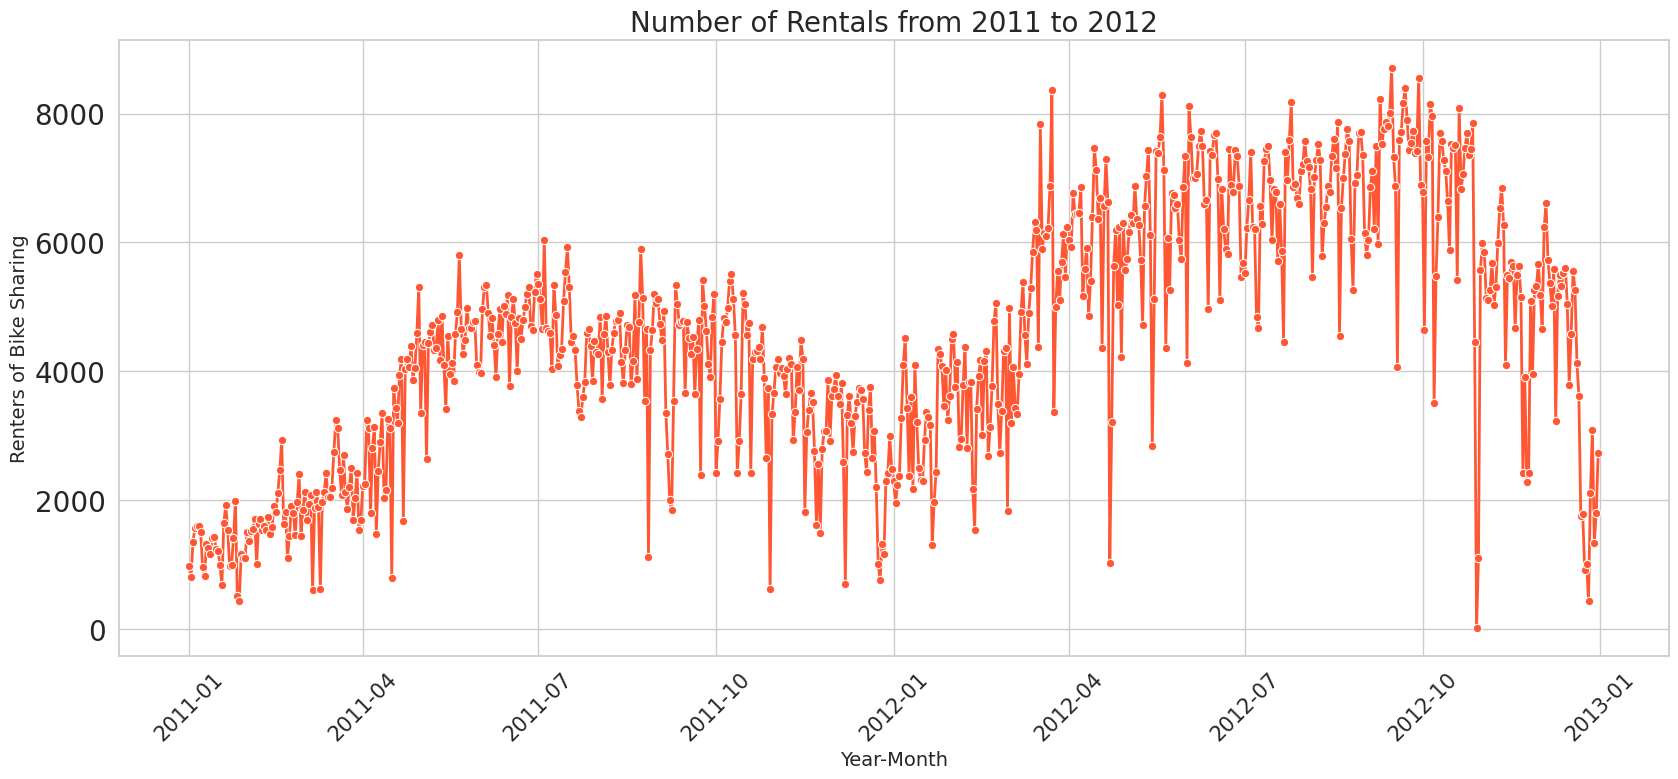

In [172]:
plt.figure(figsize=(20, 8))

sns.lineplot(
    x=day_df["dteday"],
    y=day_df["cnt"],
    marker='o',
    linewidth=2,
    color="#FF5733"
)

plt.title("Number of Rentals from 2011 to 2012", loc="center", fontsize=20)
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Renters of Bike Sharing", fontsize=14)

plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

### Pertanyaan 2: Do registered users borrow bikes more frequently than casual users, or vice versa?

In [173]:
user_type_rentals = day_df[['registered', 'casual']].sum().reset_index()
user_type_rentals.columns = ['user_type', 'total_rentals']

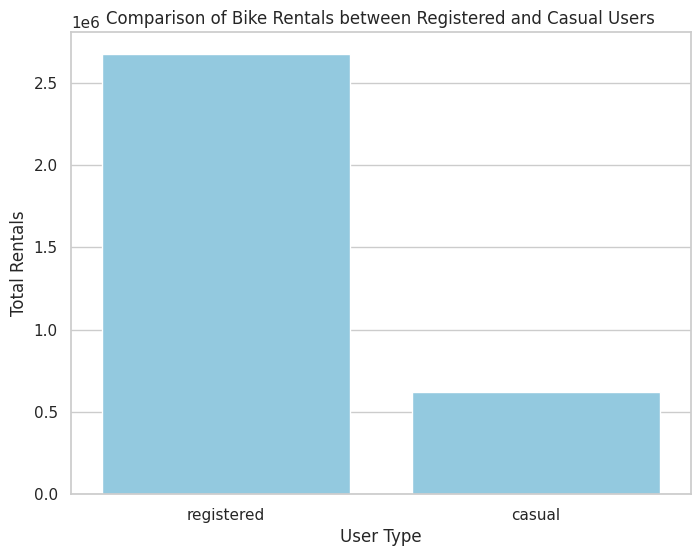

In [174]:
plt.figure(figsize=(8, 6))
sns.barplot(x='user_type', y='total_rentals', data=user_type_rentals, color='skyblue')
plt.title('Comparison of Bike Rentals between Registered and Casual Users')
plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.show()

In [175]:
daily_average_rentals = day_df[['dteday', 'registered', 'casual']].set_index('dteday').resample('D').mean()


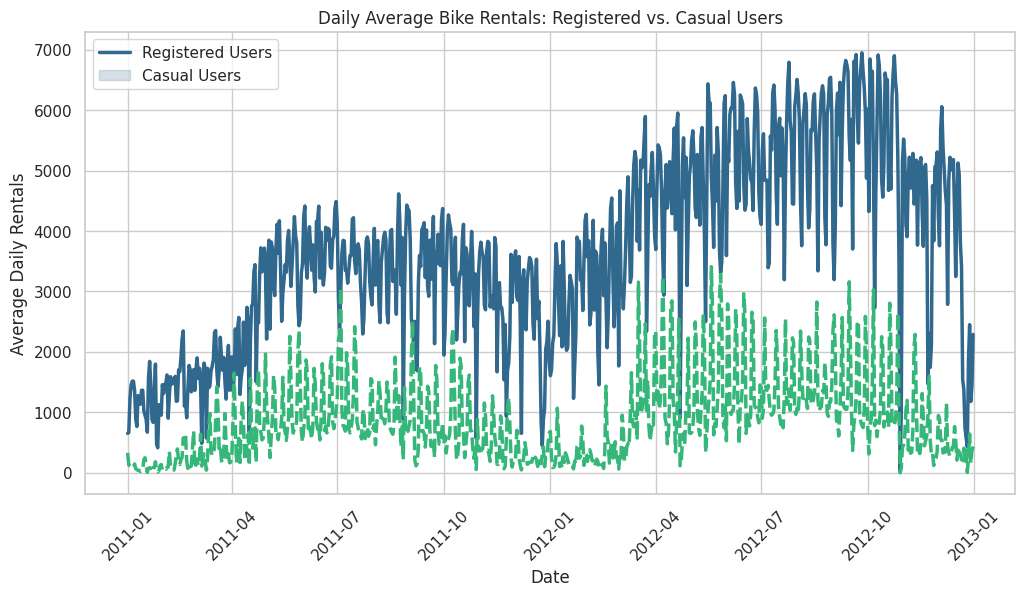

In [176]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_average_rentals, palette='viridis', linewidth=2.5)
plt.title('Daily Average Bike Rentals: Registered vs. Casual Users')
plt.xlabel('Date')
plt.ylabel('Average Daily Rentals')
plt.legend(labels=['Registered Users', 'Casual Users'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**
This graph provides a simple comparison of bike rentals between registered and casual users.  It's pretty clear that registered users rent bikes way more often. This big difference suggests that registered users are the main customers for the bike rental company.

### Pertanyaan 3: For casual users, are rentals concentrated on specific days like weekends, leading them to avoid registering for membership?

In [177]:
average_casual_weekday = day_df.groupby('weekday', observed=True)['casual'].mean().reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

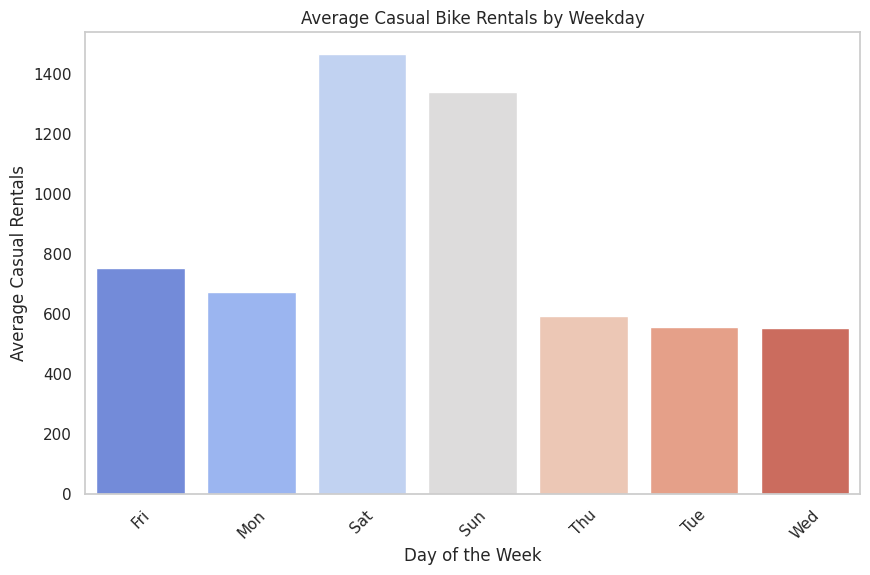

In [178]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='casual', hue='weekday', data=average_casual_weekday, palette='coolwarm', dodge=False, legend=False)
plt.title('Average Casual Bike Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Casual Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight:**
This bar chart shows how many bikes casual users rent on average each day of the week.  It looks like Saturdays are the most popular days to rent a bike, followed closely by Sunday.  Rentals drop off quite a bit during the week, with Monday through Wednesday being the least popular days.

### Pertanyaan 4: How do seasons and weather conditions influence consumer behavior in bike rentals?

In [179]:
season_weather_rentals = day_df.groupby(['season', 'weathersit'], observed=True)['cnt'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


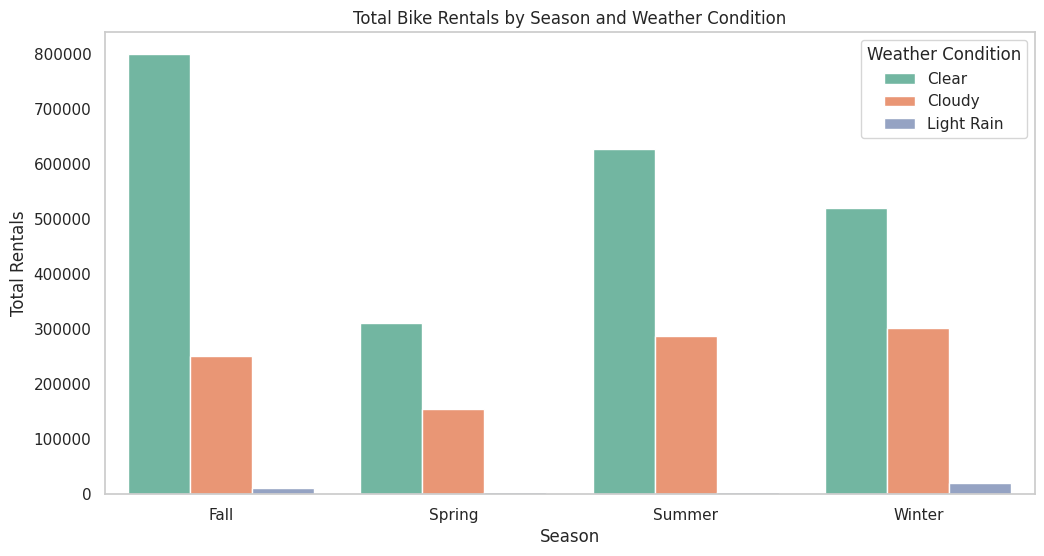

In [180]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=season_weather_rentals, palette='Set2')
plt.title('Total Bike Rentals by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Condition')
plt.grid(axis='y')
plt.show()

**Insight:**
This chart shows us how many bikes get rented in different seasons and types of weather.  Summer is the most popular time to rent bikes, especially when it's sunny and clear.  People still rent bikes in spring and fall, but not as much as in the summer.  Winter is the least popular time for bike rentals, probably because it's cold and snowy.  We can also see that rainy weather really discourages people from renting bikes, no matter what the season.

## Analisis Lanjutan (Opsional)

In [193]:
rfm_df = day_df.groupby(by="weekday", as_index=False, observed=False).agg({
    "dteday": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "cnt": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,weekday,frequency,monetary,recency
0,Fri,104,487790,3
1,Mon,105,455503,0
2,Sat,105,477807,2
3,Sun,105,444027,1
4,Thu,104,485395,4
5,Tue,104,469109,6
6,Wed,104,473048,5


## Conclusion

- Conclution pertanyaan 1: Based on the data in the graph, it is clear that bike rentals increased in 2012 compared to 2011. This upward trend is shown by a general increase in the number of rentals, higher peaks in 2012, and even the lowest points of rentals in 2012 generally being higher than in 2011. This indicates that the bike rental service became more popular and was used more frequently in 2012.
- Conclution pertanyaan 2: In conclusion, the data in the "Daily Average Bike Rentals: Registered vs. Casual Users" graph shows that registered users borrow bikes far more frequently than casual users. This is evident in the trend lines, the average daily rentals, and the more prominent seasonal patterns among registered users.
- Conclution pertanyaan 3: The "Average Casual Bike Rentals by Weekday" graph illustrates that casual users tend to concentrate their bike rentals on specific days, particularly weekends.  Average rentals on Saturday and Sunday are significantly higher than on weekdays. This pattern suggests that casual users are more likely to use the bike rental service for leisure or recreational activities on weekends, rather than for commuting or regular transportation as registered users typically do. This weekend-focused usage pattern may be a key reason why they choose not to register for a membership, as their needs are likely met through occasional rentals without the commitment of a membership fee.
- Conclution pertanyaan 4: The "Total Bike Rentals by Season and Weather Condition" graph illustrates that both season and weather conditions significantly influence consumer behavior in bike rentals. Generally, bike rentals are most popular during summer and in clear weather, with this combination yielding the highest rental counts. Spring and fall also show reasonably high rentals, especially in clear weather, though not as high as summer. Conversely, winter consistently has the lowest rental counts across all weather conditions, indicating that cold temperatures and less favorable weather decrease public interest in cycling. Additionally, poor weather, especially light rain, drastically reduces rentals across all seasons. This data highlights that consumers tend to rent bikes in favorable weather and warmer seasons, suggesting that comfort and environmental conditions are important factors in their decision-making.

In [195]:
day_df.to_csv("day_data.csv", index=False)

In [196]:
hour_df.to_csv("hour_data.csv", index=False)